# Dimensionality Reductions (Unsupervised)

## Resources
- [Step by Step Explanation of PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
- [Video on PCA](https://statquest.org/statquest-principal-component-analysis-pca-step-by-step/)
- [Visual Explanation of PCA](https://setosa.io/ev/principal-component-analysis/)

When working with big data, we often work with data that has a lot of columns -- or a lot of dimensions. Machine learning is a great tool to use with high dimensional data because it can pick up on patterns in high dimensional spaces that would be impossible for humans to pick up on. However, challenges can arise when working with high dimensional data.

The "curse of dimensionality" refers to a phenomenon that arises when working in increasingly higher dimensional spaces - as the number of features increases, the amount of data needed to accurately generalize a model to new data grows exponentially.

Dimensionality reduction refers to any technique where we try to reduce the feature space we are working with. In general, there are two types of dimensionality reduction:

- Feature Selection
- Feature Extraction


## Feature Selection

You have already been doing feature selection! This is the process of selecting a subset of features to model on. For example, if you are building a model to predict the price of homes, you can choose to use only the top most important features in your final model and leave out the features that may not be important to the model.

But what if you don't know which features to choose?

## Feature Extraction

Feature extraction refers to techniques where you take all of your features and combine them in certain ways to reduce them into lower dimensions.

## PCA

Principal Component Analysis, abbreviated as PCA, is one of the most common techniques used for dimensionality reduction.
It is an unsupervised learning technique, meaning we do not use a target/y-vector for this technique! PCA is applied to our features and is used to reduce the dimensions of our dataset.

PCA transforms our features into a new set of variables called Principal Components, which are linear combinations of all of our original features. The algorithm relies heavily on linear algebra topics and understanding the math behind it is beyond the scope of this course, but if you are interested in learning more about how the algorithm works behind the scenes, check out the optional sections at the end of this chapter.

The Principal Components (PCs) are arranged in order of how much variability they explain: the first PC explains the most variance of our original data, while the last PC explains the least amount of variation of our original data. We choose a select number of PCs that cumulatively explain enough variance in our data yet still reduces the dimensionality of our feature space.

### Uses of PCA

PCA is useful for two main tasks:

- Visualization: if we have high-dimensional data that would be impossible to visualize, sometimes by transforming that data into a lower-dimensional space we can visualize things like clusters.
- Dimensionality reduction to improve model speed: we can use PCA to first reduce the dimensions of our data, then use the PCs for modeling.

### Assumptions of PCA

When doing PCA, we assume:

There are linear relationships between our features.
Importance is determined from variance, i.e. higher variance means it is more important.
All of our original features have the same units (if they don't, you need to scale your data!).



# PCA for Data Visualization

One common application of PCA is to transform our data into lower-dimensional spaces in order to visualize it, a task that is impossible to do when we are working with more than 3 dimensions.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

The data we will use here is from this [source](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/) and describes information about various types of iris flowers.

Let's say we want to cluster the data into different flower varieties. We might want to visually check how many clusters would be reasonable. Notice that we have several dimensions here and it would be tough to visualize this data as-is (we could only visualize a few features at a time).

We can use PCA to transform this data into less dimensions!

## Load the Dataset

In [2]:
# We can get the Iris dataset from the UCI datasets
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# df['target'].value_counts()

KeyError: 'target'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   150 non-null    float64
 1   PCA_2   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [4]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Scale Data

In [5]:
# Select the features from the dataset 
X = df.drop(columns = 'target')

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(X)

## Apply PCA

In [6]:
# Instantiate, fit & transform data using PCA
# PCA_1 --> most vairaince 
# PCA_2 --> more variance 
# PCA_3 --> some varaince 
# PCA_4 --> least varaince 
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)



## Use output of PCA to Visualize PCA
We can now clearly visualize the clusters in our dataset (which originally had 4 dimensions)!

In [8]:
# Note: our 2 new feature "principal components" representing 

pcs[:,0]
# pcs[:,1]

array([-2.26454173, -2.0864255 , -2.36795045, -2.30419716, -2.38877749,
       -2.07053681, -2.44571134, -2.23384186, -2.34195768, -2.18867576,
       -2.16348656, -2.32737775, -2.22408272, -2.63971626, -2.19229151,
       -2.25146521, -2.20275048, -2.19017916, -1.89407429, -2.33994907,
       -1.91455639, -2.2046454 , -2.77416979, -1.82041156, -2.2282175 ,
       -1.95702401, -2.05206331, -2.16819365, -2.14030596, -2.26879019,
       -2.14455443, -1.8319381 , -2.60820287, -2.43795086, -2.18867576,
       -2.2111199 , -2.04441652, -2.18867576, -2.4359522 , -2.1705472 ,
       -2.28652724, -1.87170722, -2.55783442, -1.96427929, -2.13337283,
       -2.07535759, -2.38125822, -2.39819169, -2.22678121, -2.20595417,
        1.10399365,  0.73248144,  1.24210951,  0.39730728,  1.07259395,
        0.38445815,  0.74871508, -0.49786339,  0.92622237,  0.00496803,
       -0.12469746,  0.43873012,  0.55163398,  0.71716507, -0.03725838,
        0.87589054,  0.3480064 ,  0.15339254,  1.21530321,  0.15

In [ ]:
type(pcs)

In [9]:
# Converting numpyarray to dataframe 

df = pd.DataFrame(pcs, columns = ['PCA_1','PCA_2'])

df.head()

,PCA_1,PCA_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


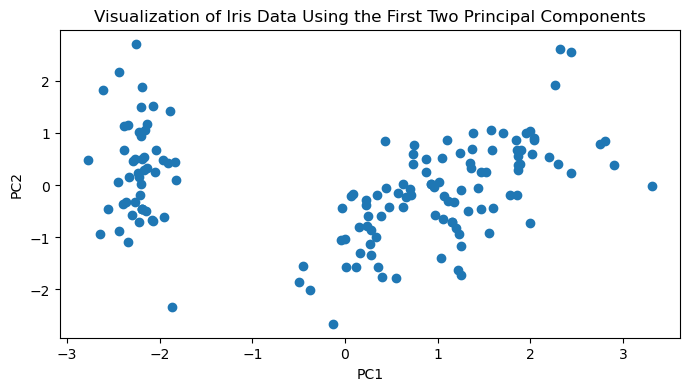

In [10]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))

plt.scatter(pcs[:,0], pcs[:,1])
plt.title('Visualization of Iris Data Using the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

# PCA for Supervised Machine Learning
PCA itself is an unsupervised machine learning task. However, it is often used in conjunction with a supervised machine learning model to reduce the dimensions used in the algorithm and therefore improve speed.

## Using PCA to Speed Up a Supervised Machine Learning Model in Python
Let's try this in Python using the [Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). You can download the data here. Note that this is a relatively small dataset and PCA works best on many dimensions.

In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [15]:
# Load Data

col_names = ["id","diagnosis", "radius_mean", "texture_mean", "perimeter_mean", 
"area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
"concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
"radius_se","texture_se", "perimeter_se", "area_se", "smoothness_se",
"compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
"fractal_dimension_se", "radius_worst","texture_worst", "perimeter_worst",
"area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
"concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

PATH = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

df = pd.read_csv(PATH, header = None, names=col_names, index_col="id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Prepare dataset for machine learning

Notice that this dataset has 30 columns/dimensions. While this isn't very many, we can use PCA to reduce that number while still retaining information from all of the columns.

In [18]:
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']


X.shape

(569, 30)

## Scale Data

In [19]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

## Apply PCA

In [20]:
# Instantiate & fit data using PCA
# Note: Here is need all the components for the plot 
# This will help us determine the n_components we should use in ML
pca = PCA() # this is going generate 30 pcs 

pca.fit(scaled_df)


PCA()

## Visualize Scree Plot

What we are looking for in the plot below is the "elbow" or the inflection point - at what point does continuing to add more principal components only add marginal increase to the proportion of explained variance?

Based on the graph above, how many principal components should we keep?
Let's now use the principal components to build a logistic regression model to predict malignant cells.

In [21]:
# Note: this shows how much of the variance does each component explain

pd.Series(pca.explained_variance_ratio_) 

0     0.442720
1     0.189712
2     0.093932
3     0.066021
4     0.054958
5     0.040245
6     0.022507
7     0.015887
8     0.013896
9     0.011690
10    0.009797
11    0.008705
12    0.008045
13    0.005234
14    0.003138
15    0.002662
16    0.001980
17    0.001754
18    0.001649
19    0.001039
20    0.000999
21    0.000915
22    0.000811
23    0.000602
24    0.000516
25    0.000273
26    0.000230
27    0.000053
28    0.000025
29    0.000004
dtype: float64

/var/folders/tc/br6s033s3v789grzqyl95hg80000gn/T/ipykernel_5532/2517301154.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


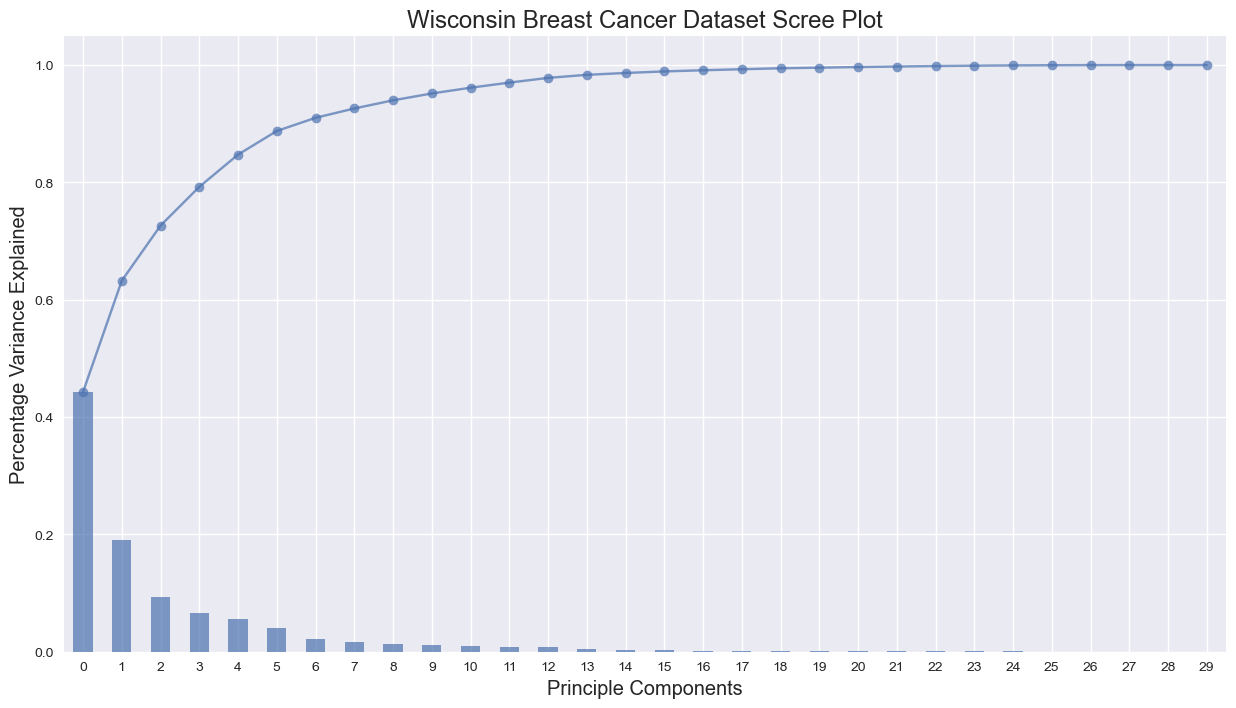

In [22]:
# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Wisconsin Breast Cancer Dataset Scree Plot", fontsize="xx-large")
plt.show();

## Split Data into Training and Testing Sets

In [23]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale Data

In [24]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Fit PCA & Apply the Results to a Logistic Regression Model

In [25]:
# fit PCA
pca = PCA (n_components=10)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
# Note: we set max_iter so model reaches convergence

logreg_noPCA = LogisticRegression(max_iter=2085)

logreg = LogisticRegression()


### Comparing Training Times

We will compare how long it takes to train a model using PCA and not using PCA

We will time our code using the magic command `%time`. Even though the dataset is hard we should expect to see a small decrease in the amount fo time it take to train a PCA model versus a non-PCA model since we have reduced the amount fo features to train.

[%timeit docs](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)

In [26]:
# Measure how long it takes to train without PCA

%timeit logreg_noPCA.fit(X_train, y_train)

10.5 s ± 2.46 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
# Measure how long it takes to train with PCA

%timeit logreg.fit(X_train_pca, y_train)

7.49 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Evaluate Model
Nice! We went from 30 features to only three features and we still have a testing accuracy of about 94%!

In [28]:
# Checking the accurancy of our model with PCA 
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Testing accuracy: 0.986013986013986


In [29]:
print('Testing accuracy:', logreg_noPCA.score(X_test, y_test))

Testing accuracy: 0.965034965034965


In [ ]:
# Possibilities of using PCA 
# 1- PCA < no_PCA --> without PCA we have a better model --> true for most cases --> this makes sense 
# with PCA we have less columns --> less information --> less accuracy 
# you have a trade-off --> less data run quickly VS more data run slow BUT more accuracte

# Note: I said PCA < no_PCA NOT PCA <<<<< no_PCA
# for example with PCA = 0.95 and no_PCA = 0.965 --> 1.5% --> I can still choose PCA 
# for example with PCA = 0.8 and no_PCA = 0.95 --> 15% --> NO NO NO PCA  

# 2- PCA > no_PCA --> this happens to proof --> more data is not necessary more information 
# more data sometimes can be noise that impact ML model performance 
# definitely use the PCA 



## PCA and Pipelines

Now that we know the steps needed to perform PCA, lets use a pipeline to perform all steps in order. Notice that we are specifying the `n_components` hyper-parameter since we are happy with the results achieved using only 3 principle components.

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [33]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=10),
    LogisticRegression()
    
)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)


0.986013986013986

In [34]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


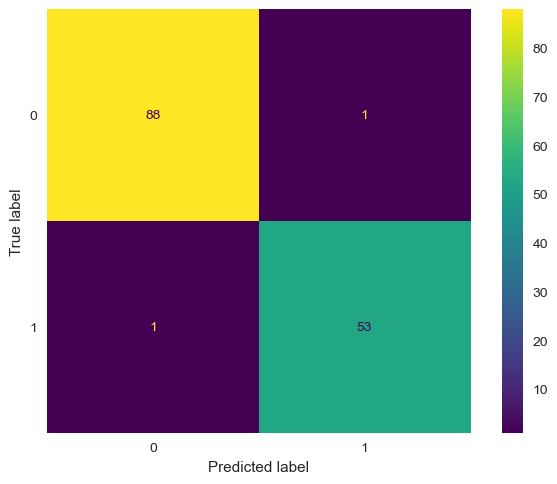

In [35]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);

## Grid Search CV

[more details click here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [36]:
# Remake Pipeline and let grid search tell us the best hyper parameters
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "standardscaler__with_mean": [True, False], 
    "standardscaler__with_std": [True, False],
    
    "pca__n_components": range(1,11), # 10 components explains the most variance
    
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [100, 500, 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid=param_grid, 
    cv=5, 
    verbose= 0,
    n_jobs=-1 # use all processors to run GridSearch
)

grid.fit(X_train,y_train)

# Note --> number of models we are building = 2 X 2 X 10 X 10 X 5 X 5 = 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [100, 500, 1000, 2000,
                                                          2500],
                         'pca__n_components': range(1, 11),
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]})

In [38]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056109,0.020181,0.018933,0.011964,1,100,1,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.872093,0.929412,0.894118,0.905882,0.905882,0.901477,0.018637,1801
1,0.080313,0.061395,0.008603,0.006474,1,100,1,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.918605,0.858824,0.952941,0.847059,0.858824,0.887250,0.041304,1901
2,0.055760,0.034103,0.009330,0.005904,1,100,1,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.872093,0.929412,0.894118,0.905882,0.905882,0.901477,0.018637,1801
3,0.047776,0.007027,0.010299,0.005928,1,100,1,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.918605,0.858824,0.952941,0.847059,0.858824,0.887250,0.041304,1901
4,0.050592,0.016789,0.011359,0.012714,1,100,2,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.941860,0.929412,0.952941,0.929412,0.964706,0.943666,0.013699,839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.098642,0.027527,0.003538,0.001342,0.1,2500,9,False,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.953488,0.929412,0.988235,0.941176,0.905882,0.943639,0.027276,909
1996,0.016830,0.005793,0.003004,0.000663,0.1,2500,10,True,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.988372,0.964706,0.988235,0.941176,0.964706,0.969439,0.017637,1
1997,0.110507,0.035954,0.004608,0.001198,0.1,2500,10,True,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.953488,0.929412,0.988235,0.941176,0.894118,0.941286,0.030721,1272
1998,0.017132,0.003839,0.003525,0.001120,0.1,2500,10,False,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.988372,0.964706,0.988235,0.941176,0.964706,0.969439,0.017637,1


In [39]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components','param_standardscaler__with_mean','param_standardscaler__with_std','mean_test_score','rank_test_score']

grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.901477,1801
1,100,1,True,False,0.887250,1901
2,100,1,False,True,0.901477,1801
3,100,1,False,False,0.887250,1901
4,100,2,True,True,0.943666,839
...,...,...,...,...,...,...
1995,2500,9,False,False,0.943639,909
1996,2500,10,True,True,0.969439,1
1997,2500,10,True,False,0.941286,1272
1998,2500,10,False,True,0.969439,1


In [40]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1954,2000,9,False,True,0.969439,1
1594,2500,9,False,True,0.969439,1
1136,2000,5,True,True,0.969439,1
1138,2000,5,False,True,0.969439,1
1876,500,10,True,True,0.969439,1
...,...,...,...,...,...,...
723,2000,1,False,False,0.887250,1901
721,2000,1,True,False,0.887250,1901
1883,1000,1,False,False,0.887250,1901
203,100,1,False,False,0.887250,1901


In [41]:
# Find out how many of the combinaitons ranks 1st
grid_df['rank_test_score'].value_counts()

271     290
909     198
81      190
721     118
1162    110
1901    100
1361    100
1801    100
1701    100
1601    100
1461     90
601      80
1        80
1272     79
839      70
561      40
1107     30
1551     30
1137     25
681      20
701      20
1581     10
1351     10
1591     10
Name: rank_test_score, dtype: int64

In [42]:
# Best Parameters
grid.best_params_

{'logisticregression__C': 0.5,
 'logisticregression__max_iter': 100,
 'pca__n_components': 5,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [43]:
# Lets choose all the 80 models that ranked 1st 
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(80)

best.head()

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1954,2000,9,False,True,0.969439,1
1594,2500,9,False,True,0.969439,1
1136,2000,5,True,True,0.969439,1
1138,2000,5,False,True,0.969439,1
1876,500,10,True,True,0.969439,1


In [44]:
# lets sort those by the PCAs to choose the least number of components
best.sort_values(by = ['param_pca__n_components']).head(10)

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1018,100,5,False,True,0.969439,1
1096,1000,5,True,True,0.969439,1
1136,2000,5,True,True,0.969439,1
1138,2000,5,False,True,0.969439,1
1098,1000,5,False,True,0.969439,1
1016,100,5,True,True,0.969439,1
1056,500,5,True,True,0.969439,1
1176,2500,5,True,True,0.969439,1
1178,2500,5,False,True,0.969439,1
1058,500,5,False,True,0.969439,1


In [ ]:
best['param_pca__n_components'].value_counts()

In [ ]:
# Best Scoring Model
grid.best_score_

In [ ]:
# Lets use the best model to predict our values
pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
plot_confusion_matrix(grid, X_test, y_test)
plt.grid(False);